#### MALL CUSTOMER SEGMENTATION
    --> This data contains details of customers who shop there
    --> The attributes are Customer ID, age, gender, annual income and spending score.

#### Importing necessary libraries and adding up later

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

#### Importing the DataSet and exploring

In [26]:
Mall_Target_Customers = pd.read_csv(r"C:\Users\Vishnu Priya\Desktop\Besant MS DS\Projects ML\Mall_Customers.csv")
Mall_Target_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
Mall_Target_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
len(Mall_Target_Customers)

200

In [29]:
Mall_Target_Customers.shape

(200, 5)

In [30]:
Mall_Target_Customers.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [31]:
Mall_Target_Customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [32]:
Mall_Target_Customers["Gender"] = Mall_Target_Customers["Gender"].astype('category')
Mall_Target_Customers.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [33]:
Mall_Target_Customers["Gender"] = Mall_Target_Customers["Gender"].cat.codes
Mall_Target_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [34]:
gender_count = Mall_Target_Customers['Gender'].value_counts(dropna = False)
gender_count

0    112
1     88
Name: Gender, dtype: int64

#### Dataset visualizations

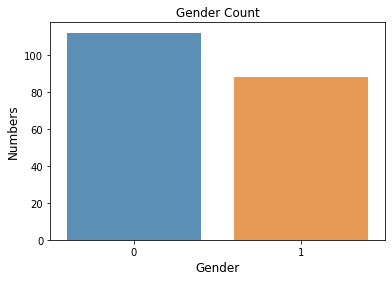

In [35]:
### Bar graph showing the value counts of the column - Gender

sns.barplot(gender_count.index, gender_count.values, alpha = 0.8)
plt.title('Gender Count')
plt.ylabel('Numbers', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [36]:
gender_income = Mall_Target_Customers[['Gender', 'Annual Income (k$)']].groupby('Gender', as_index = False).mean()
gender_income

,Gender,Annual Income (k$)
0,0,59.250000
1,1,62.227273


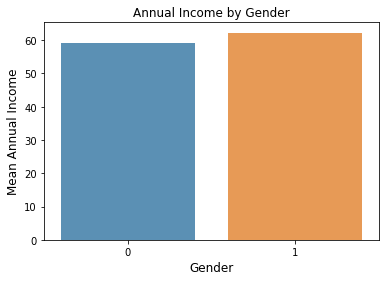

In [37]:
### Mean Annual Income by Gender

sns.barplot(gender_income['Gender'], gender_income['Annual Income (k$)'], alpha = 0.8)
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [38]:
gender_score = Mall_Target_Customers[['Gender', 'Spending Score (1-100)']].groupby('Gender', as_index = False).mean()
gender_score

,Gender,Spending Score (1-100)
0,0,51.526786
1,1,48.511364


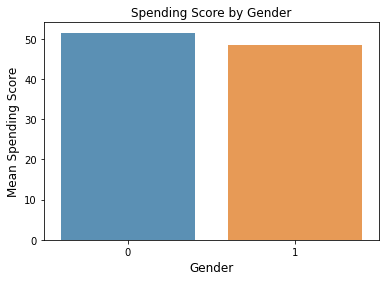

In [39]:
sns.barplot(gender_score['Gender'], gender_score['Spending Score (1-100)'], alpha = 0.8)
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [40]:
gender_age = Mall_Target_Customers[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
gender_age

,Gender,Age
0,0,38.098214
1,1,39.806818


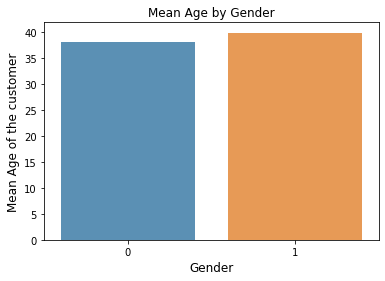

In [41]:
sns.barplot(gender_age['Gender'], gender_age['Age'], alpha = 0.8)
plt.title('Mean Age by Gender')
plt.ylabel('Mean Age of the customer', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.show()

In [42]:
Mall_Target_Customers.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [48]:
def plotting(df, variable):
    plt.figure(figsize = (16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

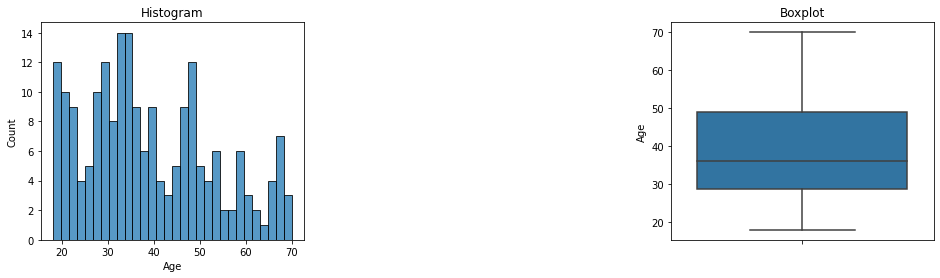

In [49]:
plotting(Mall_Target_Customers, 'Age')

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

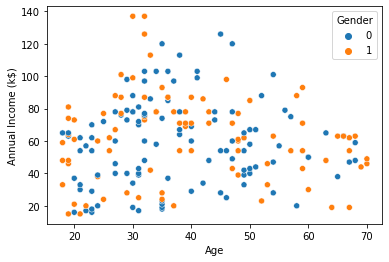

In [50]:
sns.scatterplot(data = Mall_Target_Customers, x = "Age", y = "Annual Income (k$)", hue = "Gender")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

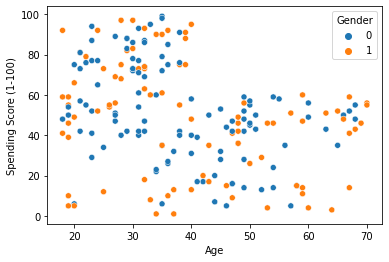

In [51]:
sns.scatterplot(data = Mall_Target_Customers, x = "Age", y = "Spending Score (1-100)", hue = "Gender")

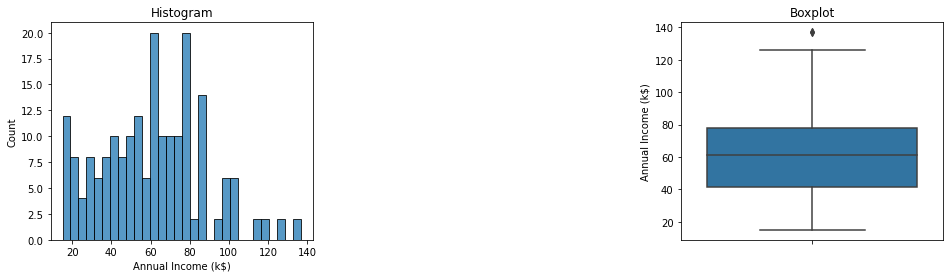

In [52]:
plotting(Mall_Target_Customers, 'Annual Income (k$)')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

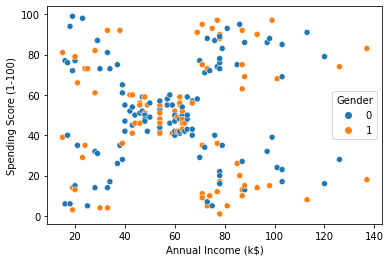

In [53]:
sns.scatterplot(data = Mall_Target_Customers, x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender")

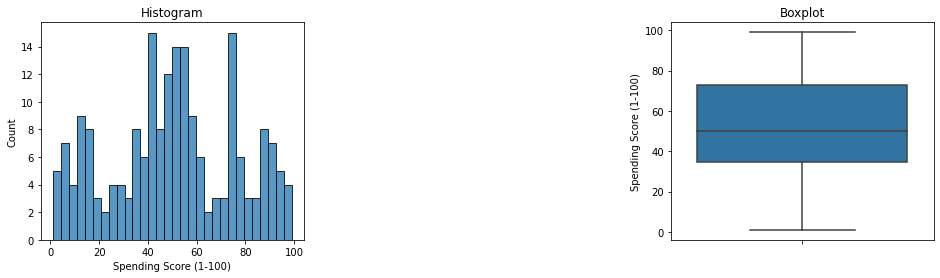

In [54]:
plotting(Mall_Target_Customers,'Spending Score (1-100)')

In [55]:
Mall_Target_Customers.drop(['CustomerID'], axis = 1, inplace = True)
Mall_Target_Customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [56]:
X = Mall_Target_Customers[['Age', 'Spending Score (1-100)']].iloc[:, :].values

#### K MEANS CLUSTERING
--ELBOW METHOD FOR FINDING THE CLUSTERS

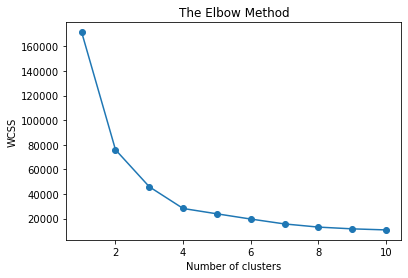

In [57]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

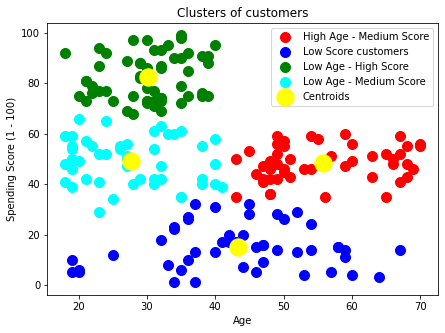

In [59]:
plt.figure(figsize = (7, 5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'High Age - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low Score customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Age - High Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Age - Medium Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [60]:
X = Mall_Target_Customers[['Age', 'Spending Score (1-100)']].iloc[:, :].values

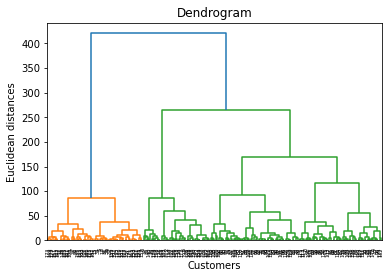

In [61]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [62]:
Heirarchical_Clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_Heirarchical_Clustering = Heirarchical_Clustering.fit_predict(X)

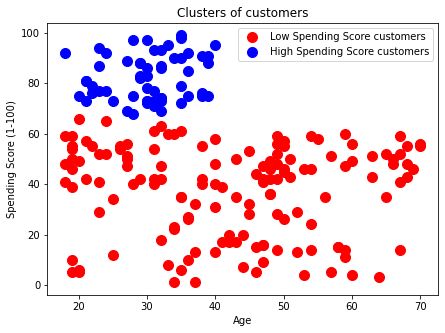

In [63]:
plt.figure(figsize = (7, 5))
plt.scatter(X[y_Heirarchical_Clustering == 0, 0], X[y_Heirarchical_Clustering == 0, 1], s = 100, c = 'red', label = 'Low Spending Score customers')
plt.scatter(X[y_Heirarchical_Clustering == 1, 0], X[y_Heirarchical_Clustering == 1, 1], s = 100, c = 'blue', label = 'High Spending Score customers')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [64]:
X = Mall_Target_Customers[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

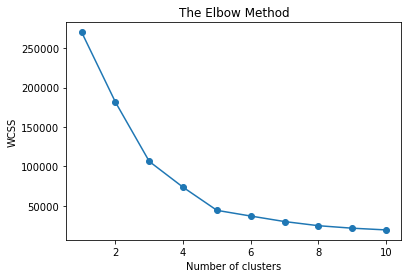

In [65]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

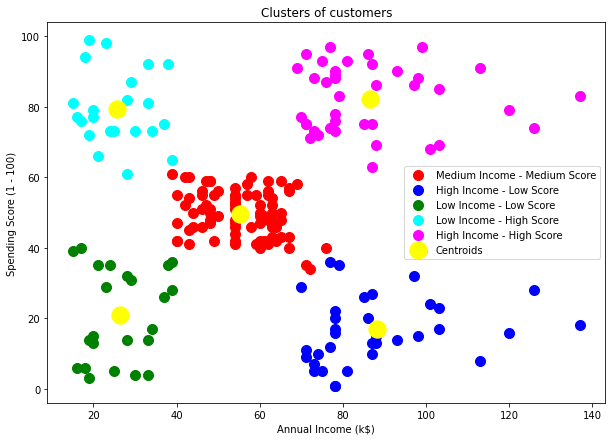

In [67]:
plt.figure(figsize = (10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Medium Income - Medium Score')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Income - Low Score')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income - High Score')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income - High Score')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [68]:
X = Mall_Target_Customers[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

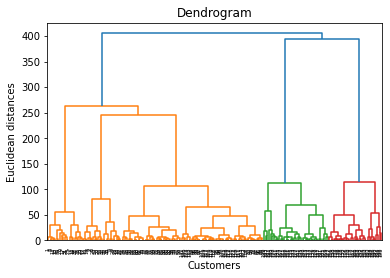

In [69]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [70]:
Heirarchical_Clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_Heirarchical_Clustering = Heirarchical_Clustering.fit_predict(X)

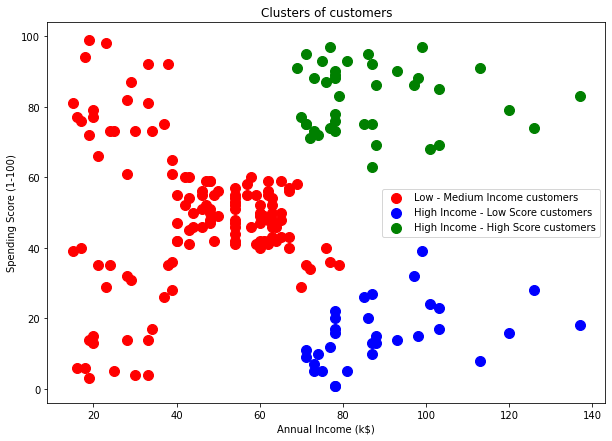

In [71]:
plt.figure(figsize = (10, 7))
plt.scatter(X[y_Heirarchical_Clustering == 0, 0], X[y_Heirarchical_Clustering == 0, 1], s = 100, c = 'red', label = 'Low - Medium Income customers')
plt.scatter(X[y_Heirarchical_Clustering == 1, 0], X[y_Heirarchical_Clustering == 1, 1], s = 100, c = 'blue', label = 'High Income - Low Score customers')
plt.scatter(X[y_Heirarchical_Clustering == 2, 0], X[y_Heirarchical_Clustering == 2, 1], s = 100, c = 'green', label = 'High Income - High Score customers')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()